## To do:

Convert release dates to months
Remove overly-correlated variables like opening weekend rev. See if opening weekend theaters is too highly correlated.
Hunt down the na values.
Maybe add difference between worldwide and domestic release dates?


In [153]:
import numpy as np
import pandas as pd
import pdb
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Ridge

In [154]:

df = pd.read_table("horror.txt", delimiter = '\t',parse_dates=True,infer_datetime_format=True,date_parser=pd.to_datetime)
df['ROI'] = df['Worldwide Box Office']/df['Production Budget']#
print df['ROI']
df['log ROI'] = df['ROI'].apply(lambda x: np.log(x) if x>0 else None)
df['adj log ROI']= df['ROI'].apply(lambda x: np.log(x+0.000192307692308/2)) #if x>0 else -100)
df['cube root ROI'] = df['ROI'].apply(lambda x : x**(1.0/3))
print df['cube root ROI']
#print df['ROI']
#print df.iloc[0:15]
#print df.columns


0        9.245475
1        2.993750
2       44.417332
3        9.092430
4        3.749322
5        0.000000
6       15.818507
7       29.773767
8       11.855712
9        0.327104
10       7.781750
11       2.724573
12       0.761501
13      11.558434
14       6.822095
15       0.000000
16       0.000000
17       0.000000
18       0.000000
19       0.000000
20       0.000000
21       0.000000
22       7.809655
23       1.372120
24       2.726945
25       0.000000
26       0.000000
27      12.931569
28      17.156920
29       0.000000
          ...    
359     78.400000
360      0.356257
361      0.171867
362      0.362796
363      1.232480
364      0.088676
365      0.212500
366      0.080874
367      0.315968
368      0.010500
369      0.003839
370      0.000192
371     10.213527
372     17.378221
373     17.985000
374      2.336377
375    108.644729
376     21.378361
377     22.625626
378     36.666667
379    215.384615
380     10.445019
381      1.786500
382     70.000000
383     14

In [155]:
# df = df[df['ROI']>0.0001]
# print np.min(dfpos['ROI'])
# #print len(df)

In [156]:
ptest = df[['Title', 'Released','Released Worldwide', 'Year', 'Theatrical Distributor','Source','Creative Type', \
            'Production Budget', 'Opening Weekend Theaters', 'Opening Weekend Revenue', 'Worldwide Box Office',\
            'Jumps', 'Rating', 'Runtime', 'IMDb Score']]
#print(df[['Title', 'Jumps']])
# for i in df:
#     if i=='0*':
#         i=-1
# maxjump = df['Jumps'].idxmax(skipna=True)
# print df[0:1]

C:\Users\Jason\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jason\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


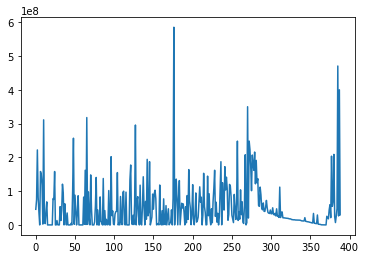

In [157]:
#print ptest.columns
#print ptest['Worldwide Box Office'][:5]
#print ptest['Released'][:5]
ptest['Released'] = pd.to_datetime(ptest['Released'], infer_datetime_format=True)
ptest['Released Worldwide'] = pd.to_datetime(ptest['Released Worldwide'], infer_datetime_format=True)
#print ptest['Released']
plt.plot(ptest['Worldwide Box Office'])
plt.show()

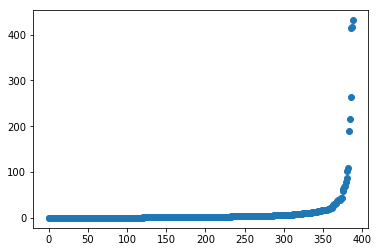

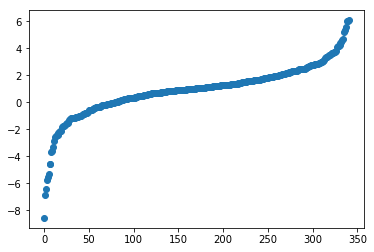

In [158]:
# print df['Theatrical Distributor'].value_counts()
# print df['Theatrical Distributor'].unique().shape
# print df['Theatrical Distributor'].unique()
# loctest = ptest.copy()
# loctest.loc(['Release'])=3
#ptest.loc(['Theatrical Distributor'])=3
#ptest.loc(['Sony Pictures', 'Theatrical Distributor'])
y = df['ROI'].copy()
#y = y.sort_values(inplace=True())
y = np.array(y)
idx = np.argsort(y)
enum = np.arange(y.shape[0])
plt.scatter(enum, y[idx])
plt.show()
y = df['log ROI'].copy()
#y = y.sort_values(inplace=True())
y = np.array(y)
idx = np.argsort(y)

plt.scatter(enum, y[idx])
plt.show()

In [159]:
# ptest = df[['Released','Released Worldwide', 'Year', 'Theatrical Distributor','Source','Creative Type', \
#             'Production Budget', 'Opening Weekend Theaters', 'Opening Weekend Revenue', 'Worldwide Box Office',\
#             'Jumps', 'Rating', 'Runtime', 'IMDb Score']]
# counts = ptest['Theatrical Distributor'].value_counts()
# print counts.loc(['Theatrical Distributor', 'Sony Pictures'])
# print counts.unique()
# for i in ptest['Theatrical Distributor']:
#     ptest.loc(['Theatrical Distributor', i]) = counts[i]

# print ptest['Theatrical Distributor']
#print(df[['Title', 'Jumps']])
#print ptest.groupby('Theatrical Distributor')
#counts = ptest.apply(lambda x: x.map(x.value_counts()))


#ptest.loc()
#counts
#print df[15:16]
#print df['Theatrical Distributor']
counts = df['Theatrical Distributor'].value_counts()
others = counts[counts<=5].index
# test = df.copy()
# test['Theatrical Distributor'].fillna("No distributor")
# print test['Theatrical Distributor']
#test.replace(test[test['Theatrical Distributor']==np.nan], 'No distributor', inplace=True)
#whatareyou = test.iloc[15]['Theatrical Distributor']#[15:16].value
#print whatareyou
#print test[test['Theatrical Distributor']==whatareyou]
#print test[15:20]
#print test[test['Theatrical Distributor']==np.nan]

#print test['Theatrical Distributor']
print ptest['Theatrical Distributor']
print ptest['Theatrical Distributor'].replace(others, 'Other', inplace=True)
print ptest['Theatrical Distributor'].unique()
#ptest.loc([:,'Theatrical Distributor']) = 3#counts.loc(['Theatrical Distributor'])
#WE SHOULDNT ACTUALLY DO THIS
#INSTEAD REPLACE ALL COUNTS WITH OTHER
# ptest['Theatrical Distributor']=counts['Theatrical Distributor']

#counts = ptest.apply(lambda x: x.value_counts())
#print ptest['Theatrical Distributor']#['Theatrical Distributor']
#print counts

0                           Universal
1                  Paramount Pictures
2                           Universal
3                           Universal
4                           Lionsgate
5                        IFC Midnight
6                       Sony Pictures
7                        Warner Bros.
8                           Universal
9                Broad Green Pictures
10                       Warner Bros.
11                 High Top Releasing
12                                A24
13                                A24
14                  STX Entertainment
15                                NaN
16                                NaN
17                                NaN
18                                NaN
19                       IFC Midnight
20                                NaN
21                                NaN
22                 Paramount Pictures
23                          Universal
24                      Sony Pictures
25                                NaN
26          

In [160]:
print ptest.columns
ptest.iloc[2]

Index([u'Title', u'Released', u'Released Worldwide', u'Year',
       u'Theatrical Distributor', u'Source', u'Creative Type',
       u'Production Budget', u'Opening Weekend Theaters',
       u'Opening Weekend Revenue', u'Worldwide Box Office', u'Jumps',
       u'Rating', u'Runtime', u'IMDb Score'],
      dtype='object')


Title                                      Split
Released                     2017-01-20 00:00:00
Released Worldwide           2017-01-18 00:00:00
Year                                        2017
Theatrical Distributor                 Universal
Source                       Original Screenplay
Creative Type               Contemporary Fiction
Production Budget                        5000000
Opening Weekend Theaters                    3038
Opening Weekend Revenue                 40010975
Worldwide Box Office                   222086658
Jumps                                          0
Rating                                      pg13
Runtime                                      117
IMDb Score                                   7.5
Name: 2, dtype: object

In [161]:
#print ptest['Production Budget'][:5]
#print titles[:5]
#print ptest[ptest['Worldwide Box Office']<=1]['Worldwide Box Office'].value_counts()
dummies = pd.get_dummies(ptest.iloc[:, 1:])
print dummies.columns.shape
#print dummies.iloc[15]
#dummies[dummies['Runtime']<=60]
#dummies = dummies['Runtime'].fillna(90)

(48L,)


In [162]:
blanks = dummies.copy()
blanks = blanks.fillna(-20)

for col in blanks.iloc[:, 3:]:
    temp= ptest[blanks[col]==-20]['Title']
    if len(temp)>0:
        print temp

In [163]:

#ptest.iloc[276]

Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,  10,  11,
            ...
            379, 380, 381, 382, 383, 384, 385, 386, 387, 388],
           dtype='int64', length=261)
0.522929960659
Lasso results:


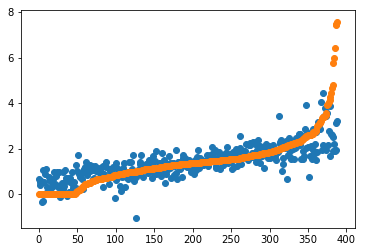

In [173]:
from sklearn.linear_model import LinearRegression

dummies3 = dummies.iloc[:, 3:].apply(lambda x: x**3)
#print dummies.iloc[0:3,3:]
X = dummies.iloc[:,3:] #dummies3#.iloc[:, 3:]
#y = df['log ROI']
posidx = df[df['log ROI']>0].index
print posidx
y = df['cube root ROI']
#print X

lassoreg = LassoLars(alpha=0.001,normalize=True, max_iter=10000)
lassoreg.fit(X,y)

print lassoreg.score(X,y)
print("Lasso results:")
zip(dummies.columns[3:],lassoreg.coef_)

lassohat = lassoreg.predict(X)
resid = lassohat-y
npy = np.array(y)
nphat = np.array(lassohat)
idx = np.argsort(y)
plt.scatter(np.arange(len(y)), lassohat[idx])
plt.scatter(np.arange(len(y)), y[idx])
plt.show()

In [172]:
from sklearn.linear_model import LinearRegression
print posidx
print len(dummies)
y2 = y[posidx]
dummies2 = dummies[posidx]
#print dummies.iloc[0:3,3:]
X = dummies2.iloc[:,3:] #dummies3#.iloc[:, 3:]
y = df[posidx]['log ROI']
#print X

lassoreg = LassoLars(alpha=0.001,normalize=True, max_iter=10000)
lassoreg.fit(X,y)

print lassoreg.score(X,y)
print("Lasso results:")
zip(dummies.columns[3:],lassoreg.coef_)

lassohat = lassoreg.predict(X)
resid = lassohat-y

plt.scatter(np.arange(len(resid)), resid)
plt.show()

Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,  10,  11,
            ...
            379, 380, 381, 382, 383, 384, 385, 386, 387, 388],
           dtype='int64', length=261)
389


IndexError: indices are out-of-bounds

In [117]:
ridgereg = Ridge(alpha=0.05,normalize=True)
ridgereg.fit(X,y)
print ridgereg.score(X,y)
print("Ridge results:")
zip(dummies.columns[3:],ridgereg.coef_)

0.52390646657
Ridge results:


[('Production Budget', -4.0129227324239604e-08),
 ('Opening Weekend Theaters', 0.00051530525244370393),
 ('Opening Weekend Revenue', -5.4554493559635413e-09),
 ('Worldwide Box Office', 1.0660365605966816e-08),
 ('Jumps', 0.020087290346990094),
 ('Runtime', -0.0040105923356195524),
 ('IMDb Score', 0.29896750592989585),
 ('Theatrical Distributor_20th Century Fox', 0.45223791588511741),
 ('Theatrical Distributor_Lionsgate', 0.68186828829673851),
 ('Theatrical Distributor_MGM', 0.23604960861127372),
 ('Theatrical Distributor_Magnolia Pictures', -0.39423778353215366),
 ('Theatrical Distributor_Miramax', 0.31119674586184487),
 ('Theatrical Distributor_Miramax/Dimension', -0.010201732889379221),
 ('Theatrical Distributor_New Line', 0.89828630512908836),
 ('Theatrical Distributor_Other', 0.33526641103285471),
 ('Theatrical Distributor_Paramount Pictures', 0.88422811293684034),
 ('Theatrical Distributor_Sony Pictures', 0.14208257005807107),
 ('Theatrical Distributor_Universal', 0.40553255185412

In [39]:
from sklearn.svm import SVR
Xtr = X[:300]
Ytr = y[:300]
Xtest = X[300:]
ytest = y[300:]
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(X,y)
print svr_rbf.score(X,y)
yhats = svr_rbf.predict(Xtest)

ydiff=yhats-ytest
print np.dot(ydiff,ydiff)/len(ydiff)

-1762.60471468
6210.40750954


In [65]:
#y_pred = lassoreg.predict(data[predictors])
# rss = np.sum((y_pred - df['ROI'])**2)
import statsmodels.formula.api as sm
lm = LinearRegression()
lm.fit(X,y)
coefs =  lm.coef_
print lm.score(X,y)
print("OLS results: ")
zip(dummies.columns[3:], coefs)

0.554638454651
OLS results: 


[('Production Budget', -2.6418340760406456e-08),
 ('Opening Weekend Theaters', 0.00022763012502486008),
 ('Opening Weekend Revenue', -1.6826015195964086e-08),
 ('Worldwide Box Office', 9.0057563173616027e-09),
 ('Jumps', 0.0090220392162191701),
 ('Runtime', -0.0060846532011754467),
 ('IMDb Score', 0.17293557990338587),
 ('Theatrical Distributor_20th Century Fox', 0.67454130617513286),
 ('Theatrical Distributor_Lionsgate', 0.78827065655570661),
 ('Theatrical Distributor_MGM', 0.64899707420482178),
 ('Theatrical Distributor_Magnolia Pictures', 0.48947246677348399),
 ('Theatrical Distributor_Miramax', 0.53217248226414304),
 ('Theatrical Distributor_Miramax/Dimension', 0.66205797783602127),
 ('Theatrical Distributor_New Line', 0.98076138999424689),
 ('Theatrical Distributor_Other', 0.75916943268878023),
 ('Theatrical Distributor_Paramount Pictures', 1.2831098111257426),
 ('Theatrical Distributor_Sony Pictures', 0.61117466809653875),
 ('Theatrical Distributor_Universal', 0.77353239940451968

0.402086087121
2.47425188159


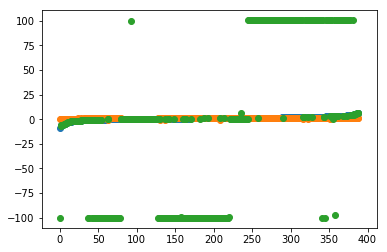

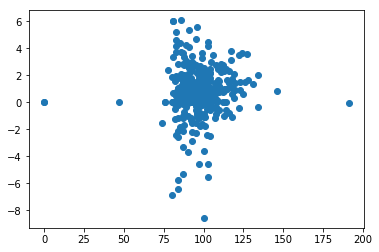

In [41]:
print lm.score(X,y)
yhat = lassoreg.predict(X)
rbf = svr_rbf.predict(X)
both = zip(yhat,y)

#print enum


mse=0.0
cnt=0.0
y2 = []
yhat2 = []
yhat3 = []
for i in range(y.shape[0]):
    if y[i]<100:
        mse+=(y[i]-yhat[i])**2
        cnt+=1.0
        y2.append(y[i])
        yhat2.append(yhat[i])
        yhat3.append(rbf[i])
print mse/cnt
enum = np.arange(len(yhat2))

y2=np.array(y2)
yhat2 = np.array(yhat2)
yhat3 = np.array(yhat3)
idx = np.argsort(y2)
#print idx
y2 = y2[idx]
#print y2
yhat2 = yhat2[idx]
yhat3 = yhat3[idx]
plt.scatter(enum, y2)
plt.scatter(enum, yhat2)
plt.scatter(enum, yhat3)
plt.show()

#plt.scatter(df['Runtime'], y)
#plt.show()

In [42]:

#CODE IN A COLUMN FOR DIFFERENCE IN RELEASE DATES
#MONTH OF YEAR
#DISTRIBUTOR TOTALS
#ROI
#JUMP SCARES
#PG13/R RATINGS
#RUN TIMES

#dist_counts = ptest.groupby('Theatrical Distributor')

def get_dict(col):
    #pdb.set_trace()
    xdict = {}
    val=0
    for x in col:
        if not x in xdict:
            #print('Nope')
            xdict[x] = val
            val+=1
    return xdict
def replace_from_dict(x,xdict):
    if x in xdict:
        x = xdict[x]
    return x

#returns the average "normalized" squared leave-one-out cross-validation error
def cross_val(X,y, model):
    error = 0.0
    size = len(y)
    #alltrained = model.fit(X,y)
    #allyhat = model.predict(X)
    #ybar = np.mean(y)
    #yhatbar = np.mean(allyhat)
    for i in range(size):
        mask = np.ones(size, dtype=bool)
        mask[i] = 0
        trained = model.fit(X[mask], y[mask])
        guess = trained.predict(X.iloc[i].values.reshape(1,-1))
        ierr = (guess-y[i])**2
        error+=ierr/guess/guess#/ybar/yhatbar
    return error/size

err = cross_val(X,y,lassoreg)
#print lassoreg.predict(X.iloc[1].values.reshape(1,-1))
print err
print cross_val(X,y,lm)
print cross_val(X,y,ridgereg)
# #print ptest['Source'][:5]
# xdict = get_dict(ptest['Source'])
# print ptest['Source'][:5]
# print xdict
# print replace_from_dict('Original Screenplay',xdict)
# ptest['Source']=ptest.apply((lambda x: replace_from_dict(x['Source'],xdict)), axis=1)
# print ptest['Source'][:10]


# for col in ptest:
#     cdict = get_dict(col) 
#     col = ptest.apply((lambda x: replace_from_dict(x['Source'],xdict)), axis=1)

[ 162.31409149]
[ 42.91837878]
[ 40.78580941]


In [ ]:
# ptest = ptest.replace( '[\$,)]','', regex=True )
# ptest['ROI']=ptest['Domestic Box Office'].astype(float)/ptest['Production Budget'].astype(float)
# ptest[['Title','Source','Theatrical Distributor','Production Budget','Domestic Box Office','ROI']]